In [1]:
%matplotlib inline 
import pandas as pd

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Drop Columns with Large Amounts of Null

In [3]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [4]:
# Date is irrelevant
# Sunshine and Evaporation have over 60k nans
# RISK_MM is too correlated
# Cloud 9am, Cloud 3pm 50k nans
# WindDir, we are measuring form different locations
df = df.drop(columns=['Date', 'Sunshine', 'Evaporation', 'RISK_MM', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'Location'])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [5]:
df.isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [6]:
df = df.dropna()
df.shape

(119590, 14)

In [7]:
# Encode Binary Labels for True/False Values
df['RainToday'] = df['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


### Identify Outliers
By plotting histograms of our features we are able to visualize the distribution and identify outliers.

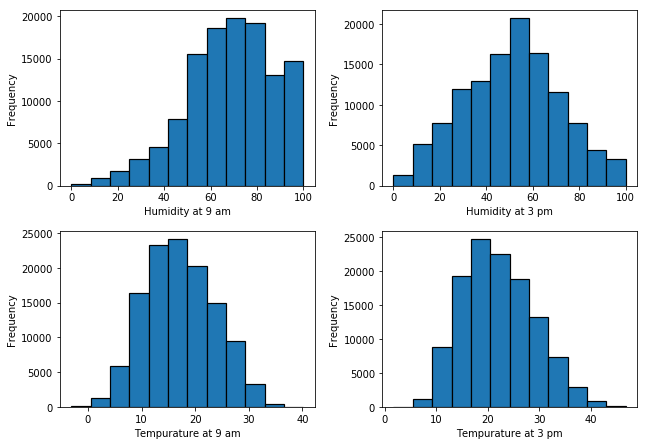

In [8]:
import matplotlib.pyplot as plt
n_bins = 12
grid = plt.GridSpec(4, 4)#, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])

ax1.hist(df['Humidity9am'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Humidity at 9 am')
ax1.set_ylabel('Frequency')

ax2.hist(df['Humidity3pm'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax2.set_xlabel('Humidity at 3 pm')
ax2.set_ylabel('Frequency')

ax3.hist(df['Temp9am'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax3.set_xlabel('Tempurature at 9 am')
ax3.set_ylabel('Frequency')

ax4.hist(df['Temp3pm'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax4.set_xlabel('Tempurature at 3 pm')
ax4.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

We can see there are some clear outliers in humidity and tempurature at 9 am and 3 pm. Below we trim off some outliers for some of our features.

In [9]:
print(f"Dropping {len(df[df['Temp9am'] <= 5])} rows where (Temperature at 9 am) is less than 6 degrees")
df = df[df['Temp9am'] > 5]
print(f"Dropping {len(df[df['Temp3pm'] > 42])} rows where (Temperature at 3 pm) is greater than 42 degrees")
df = df[df['Temp3pm'] <= 42]
print(f"Dropping {len(df[df['Humidity9am'] <= 9])} rows where (Humidity at 9 am) is less than 10")
df = df[df['Humidity9am'] > 10]
print(df.shape)

Dropping 2265 rows where (Temperature at 9 am) is less than 6 degrees
Dropping 150 rows where (Temperature at 3 pm) is greater than 42 degrees
Dropping 251 rows where (Humidity at 9 am) is less than 10
(116855, 14)


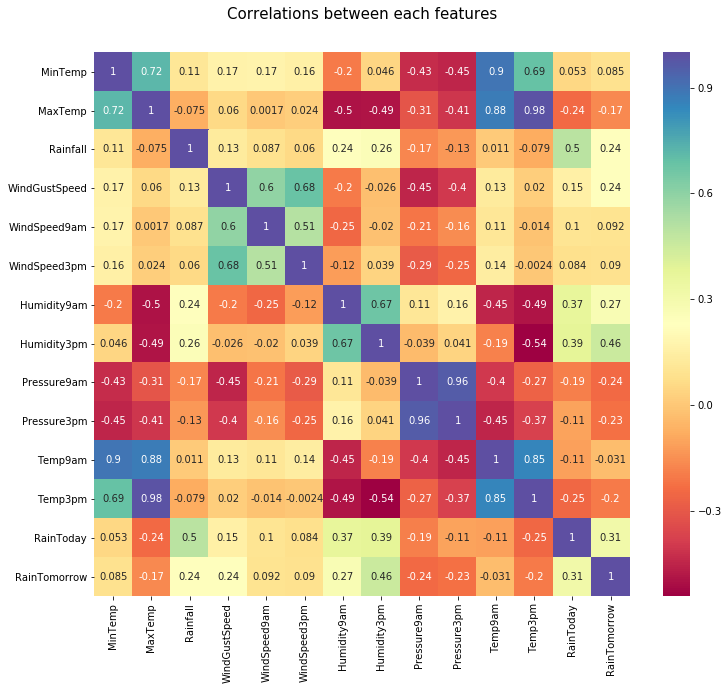

In [10]:
# update: the correlations to RainToday and RainTomorrow are also included.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
colormap = plt.cm.Spectral
plt.title('Correlations between each features', y=1.05, size=15)
corrs = df.corr()
sns.heatmap(corrs, cmap = colormap, linecolor = 'white', annot = True)

Text(0, 0.5, 'Correlation to Rainfall')

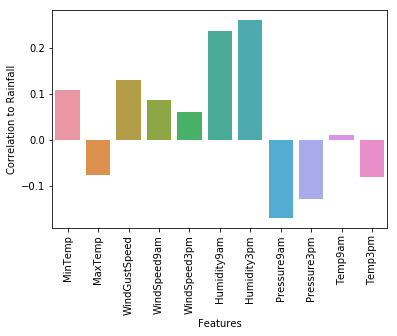

In [11]:
# I also included the graph of correlations to RainToday below. That might make more sense to analyze instead of the correlations to amount of rainfall
rainfall_corrs = corrs[['Rainfall']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'Rainfall', data = rainfall_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to Rainfall')

Text(0, 0.5, 'Correlation to RainTomorrow')

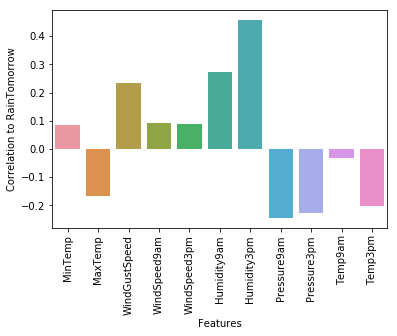

In [12]:
raintomorrow_corrs = corrs[['RainTomorrow']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainTomorrow', data = raintomorrow_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainTomorrow')

Text(0, 0.5, 'Correlation to RainToday')

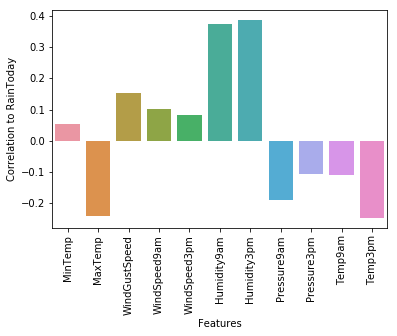

In [13]:
raintoday_corrs = corrs[['RainToday']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainToday', data = raintoday_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainToday')

#### Helper Functions

In [14]:
def plot_model_results(history):
    val_loss = history.history['val_loss']
    train_loss = history.history['loss']
    val_acc = history.history['val_acc']
    train_acc = history.history['acc']

    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [12, 5]

    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    x_range = len(train_loss)
    
    # Loss Axis
    ax1.plot(list(range(x_range)), train_loss)
    ax1.plot(list(range(x_range)), val_loss)
    ax1.set_xlabel('Epoch')
    ax1.legend(['training loss', 'validation loss'])
    ax1.set_ylabel('Binary Cross Entropy Loss')

    # Accuracy Axis
    ax2.plot(list(range(x_range)), train_acc)
    ax2.plot(list(range(x_range)), val_acc)
    ax2.legend(['training accuracy', 'validation accuracy'])
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    plt.tight_layout()
    plt.show()


def split_data(df, val_pct=.2, test_pct=.1):
    val_size   = int(val_pct * df.shape[0])
    test_size  = int(test_pct * df.shape[0])
    train_size = int((1.0 - (val_pct + test_pct)) * df.shape[0])
    df_train = df[:train_size]
    df_val = df[train_size : train_size + val_size]
    df_test = df[train_size + val_size : train_size + val_size + test_size]
    
    print(f"Training data length:   {len(df_train)}")
    print(f"Validation data length: {len(df_val)}")
    print(f"Test data length:       {len(df_test)}")

    y_train = df_train['RainTomorrow'].values
    y_test = df_test['RainTomorrow'].values
    y_val = df_val['RainTomorrow'].values
    X_train = df_train.drop(columns=['RainTomorrow']).values

    X_test = df_test.drop(columns=['RainTomorrow']).values
    X_val = df_val.drop(columns=['RainTomorrow']).values

    return X_train, X_val, X_test, y_train, y_val, y_test

## Splitting Into Targets and Labels
Below the train, test, and validation data sets are split into labels and targets then converted to numpy arrays.

In [15]:
rain_tomorrow = df['RainTomorrow']
df = (df - df.mean()) / df.std()
df['RainTomorrow'] = rain_tomorrow

X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, val_pct=.2, test_pct=.1)
df.head()

Training data length:   81798
Validation data length: 23371
Test data length:       11685


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.128913,-0.106483,-0.206059,0.275396,0.629094,0.555250,0.158151,-1.400501,-1.401285,-1.158545,-0.081504,-0.045970,-0.537262,0
1,-0.846313,0.215952,-0.276203,0.275396,-1.199439,0.324134,-1.286403,-1.255039,-0.987789,-1.057633,-0.032851,0.328283,-0.537262,0
2,0.047644,0.303889,-0.276203,0.424875,0.514810,0.786367,-1.607415,-1.012603,-1.415544,-0.927888,0.583419,0.163612,-0.537262,0
3,-0.553745,0.640980,-0.276203,-1.219390,-0.399456,-1.178124,-1.232901,-1.691425,0.010307,-0.336831,0.113108,0.657626,-0.537262,0
4,0.795317,1.271194,-0.159297,0.051178,-0.856589,0.093017,0.746673,-0.867141,-0.959271,-1.317121,0.064455,1.136671,-0.537262,0


## Tensorflow Feed Forward Neural Network
Below we define a feed forward neural network. The network takes as input the features of a single day. The output is a sigmoid layer meaning our output layer is essentially a logistic regression layer. We use binary cross entropy loss and accuracy to evaluate model performace. The model is evaluated on validation data on every epoch.

## Model 1 (Baseline)
Here we fit the network onto the training data set for 10 epochs. We use our validation data to prevent overfitting. We use all of the features of our dataset to establish a baseline of performance. We will compare our reduced feature performace to this model.

In [16]:
import tensorflow as tf
from tensorflow import keras

INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.callbacks import History 

history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Using TensorFlow backend.


Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 2s 25us/step - loss: 0.3733 - acc: 0.8397 - binary_crossentropy: 0.3733 - val_loss: 0.3407 - val_acc: 0.8533 - val_binary_crossentropy: 0.3407
Epoch 2/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3617 - acc: 0.8456 - binary_crossentropy: 0.3617 - val_loss: 0.3291 - val_acc: 0.8619 - val_binary_crossentropy: 0.3291
Epoch 3/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3578 - acc: 0.8472 - binary_crossentropy: 0.3578 - val_loss: 0.3265 - val_acc: 0.8620 - val_binary_crossentropy: 0.3265
Epoch 4/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3561 - acc: 0.8474 - binary_crossentropy: 0.3561 - val_loss: 0.3356 - val_acc: 0.8527 - val_binary_crossentropy: 0.3356
Epoch 5/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3539 - acc: 0.8482 - binary_crossentropy: 0.3539 - val_loss: 0.32

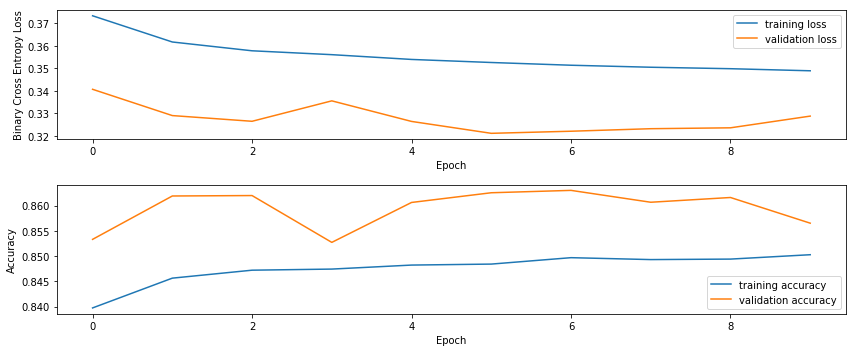

In [18]:
plot_model_results(history)

In [19]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Model 1\nTest Loss: {test_loss}\nTest Accuracy: {test_acc}")

11685/11685 [==============================] - 0s 16us/step
Model 1
Test Loss: 0.2948719399807848
Test Accuracy: 0.8709456568249893


### Now train models with different features dropped
In this section, We picked the top 5 most correlated features, and then drop them one by one. The one that affects test accuracy the most would be the most representative feature in our prediction.

Here, we rank the features based on the absolute value of their correlations, which represent the strength of correlation.

In [20]:
raintomorrow_corrs['RainTomorrow'] = [abs(i) for i in raintomorrow_corrs['RainTomorrow']]
raintomorrow_corrs = raintomorrow_corrs.sort_values(by = 'RainTomorrow', ascending = False)
raintomorrow_corrs

,index,RainTomorrow
6,Humidity3pm,0.456052
5,Humidity9am,0.271905
7,Pressure9am,0.244576
2,WindGustSpeed,0.235380
8,Pressure3pm,0.225741
10,Temp3pm,0.203483
1,MaxTemp,0.168113
3,WindSpeed9am,0.092484
4,WindSpeed3pm,0.090451
0,MinTemp,0.085088


#### Humidity 3pm

In [21]:
df_h = df.drop(columns=['Humidity3pm'])
X_train_h3pm, X_val_h3pm, X_test_h3pm, y_train_h3pm, y_val_h3pm, y_test_h3pm = split_data(df_h, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_h3pm.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = History()
model.fit(X_train_h3pm, y_train_h3pm, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_h3pm, y_val_h3pm), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 16us/step - loss: 0.3973 - acc: 0.8256 - binary_crossentropy: 0.3973 - val_loss: 0.3444 - val_acc: 0.8550 - val_binary_crossentropy: 0.3444
Epoch 2/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3805 - acc: 0.8354 - binary_crossentropy: 0.3805 - val_loss: 0.3355 - val_acc: 0.8606 - val_binary_crossentropy: 0.3355
Epoch 3/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3775 - acc: 0.8370 - binary_crossentropy: 0.3775 - val_loss: 0.3452 - val_acc: 0.8520 - val_binary_crossentropy: 0.3452
Epoch 4/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3756 - acc: 0.8376 - binary_crossentropy: 0.3756 - val_loss: 0.3403 - val_acc: 0.8561 - val_binary_crossentropy: 0.3403
Epoch 5/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3740 - acc: 0.8388 - binary_crossentropy: 0.3740 - val_loss: 0.35

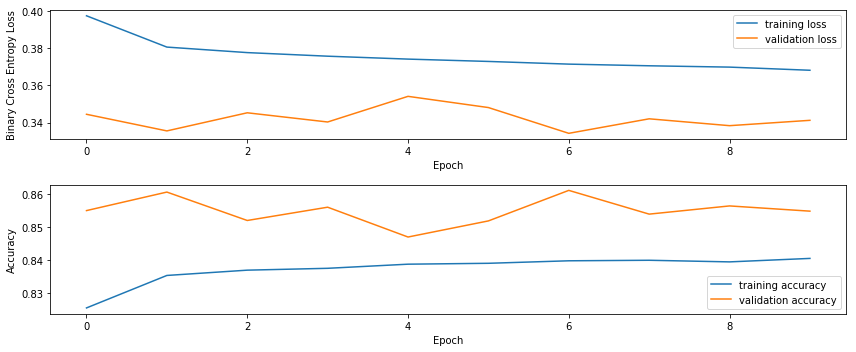

In [23]:
plot_model_results(history)

In [24]:
test_loss_h3pm, test_acc_h3pm, t = model.evaluate(X_test_h3pm, y_test_h3pm)
print(f"Test Loss: {test_loss_h3pm}\nTest Accuracy: {test_acc_h3pm}")

11685/11685 [==============================] - 0s 17us/step
Test Loss: 0.2971157275231943
Test Accuracy: 0.8711168164313222


#### Rain Today

In [25]:
df_rt = df.drop(columns=['RainToday'])
X_train_rt, X_val_rt, X_test_rt, y_train_rt, y_val_rt, y_test_rt = split_data(df_rt, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_rt.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = History()
model.fit(X_train_rt, y_train_rt, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_rt, y_val_rt), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.3780 - acc: 0.8369 - binary_crossentropy: 0.3780 - val_loss: 0.3369 - val_acc: 0.8582 - val_binary_crossentropy: 0.3369
Epoch 2/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3633 - acc: 0.8445 - binary_crossentropy: 0.3633 - val_loss: 0.3236 - val_acc: 0.8642 - val_binary_crossentropy: 0.3236
Epoch 3/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3601 - acc: 0.8458 - binary_crossentropy: 0.3601 - val_loss: 0.3221 - val_acc: 0.8642 - val_binary_crossentropy: 0.3221
Epoch 4/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3578 - acc: 0.8477 - binary_crossentropy: 0.3578 - val_loss: 0.3303 - val_acc: 0.8594 - val_binary_crossentropy: 0.3303
Epoch 5/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3562 - acc: 0.8476 - binary_crossentropy: 0.3562 - val_loss: 0.33

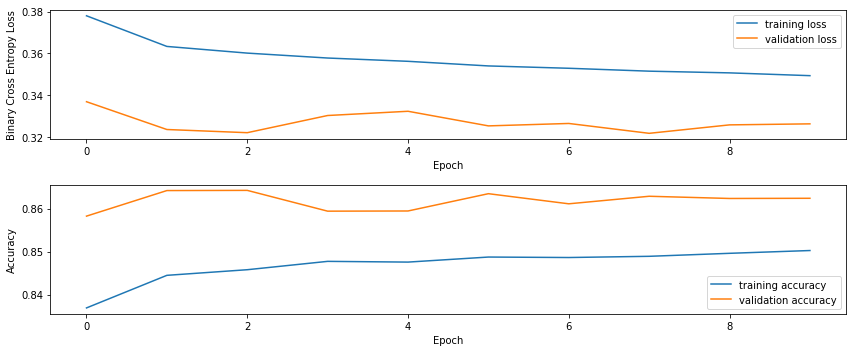

In [27]:
plot_model_results(history)

In [28]:
test_loss_rt, test_acc_rt, t = model.evaluate(X_test_rt, y_test_rt)
print(f"Test Loss: {test_loss_rt}\nTest Accuracy: {test_acc_rt}")

11685/11685 [==============================] - 0s 18us/step
Test Loss: 0.29601104659158667
Test Accuracy: 0.8723149336756525


#### Humidity 9am

In [29]:
df_h9 = df.drop(columns=['Humidity9am'])
X_train_h9am, X_val_h9am, X_test_h9am, y_train_h9am, y_val_h9am, y_test_h9am = split_data(df_h9, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_h9am.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = History()
model.fit(X_train_h9am, y_train_h9am, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_h9am, y_val_h9am), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.3779 - acc: 0.8370 - binary_crossentropy: 0.3779 - val_loss: 0.3288 - val_acc: 0.8624 - val_binary_crossentropy: 0.3288
Epoch 2/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3626 - acc: 0.8446 - binary_crossentropy: 0.3626 - val_loss: 0.3218 - val_acc: 0.8662 - val_binary_crossentropy: 0.3218
Epoch 3/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3593 - acc: 0.8463 - binary_crossentropy: 0.3593 - val_loss: 0.3202 - val_acc: 0.8656 - val_binary_crossentropy: 0.3202
Epoch 4/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3574 - acc: 0.8470 - binary_crossentropy: 0.3574 - val_loss: 0.3219 - val_acc: 0.8641 - val_binary_crossentropy: 0.3219
Epoch 5/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3561 - acc: 0.8469 - binary_crossentropy: 0.3561 - val_loss: 0.32

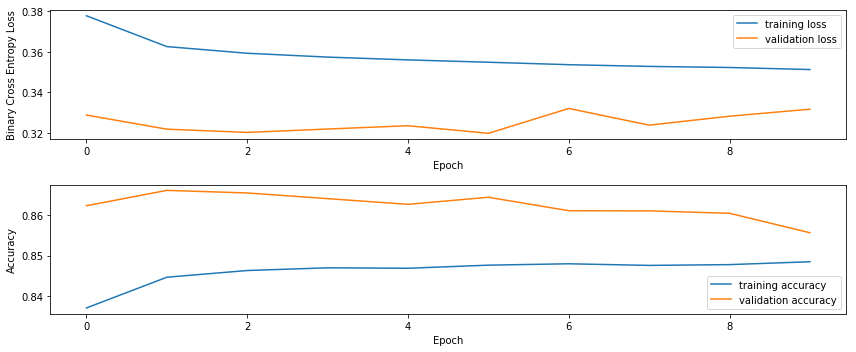

In [31]:
plot_model_results(history)

In [32]:
test_loss_h9am, test_acc_h9am, t = model.evaluate(X_test_h9am, y_test_h9am)
print(f"Test Loss: {test_loss_h9am}\nTest Accuracy: {test_acc_h9am}")

11685/11685 [==============================] - 0s 19us/step
Test Loss: 0.2925259941247574
Test Accuracy: 0.8778776208814719


#### Rainfall

In [33]:
df_rf = df.drop(columns=['Rainfall'])
X_train_rf, X_val_rf, X_test_rf, y_train_rf, y_val_rf, y_test_rf = split_data(df_rf, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_rf.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = History()
model.fit(X_train_rf, y_train_rf, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_rf, y_val_rf), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.3768 - acc: 0.8376 - binary_crossentropy: 0.3768 - val_loss: 0.3354 - val_acc: 0.8602 - val_binary_crossentropy: 0.3354
Epoch 2/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3615 - acc: 0.8454 - binary_crossentropy: 0.3615 - val_loss: 0.3321 - val_acc: 0.8603 - val_binary_crossentropy: 0.3321
Epoch 3/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3592 - acc: 0.8460 - binary_crossentropy: 0.3592 - val_loss: 0.3303 - val_acc: 0.8594 - val_binary_crossentropy: 0.3303
Epoch 4/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3568 - acc: 0.8459 - binary_crossentropy: 0.3568 - val_loss: 0.3217 - val_acc: 0.8640 - val_binary_crossentropy: 0.3217
Epoch 5/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3555 - acc: 0.8477 - binary_crossentropy: 0.3555 - val_loss: 0.33

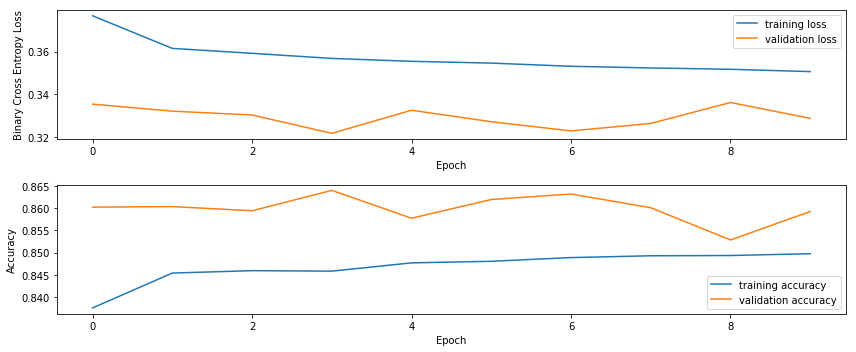

In [35]:
plot_model_results(history)

In [36]:
test_loss_rf, test_acc_rf, t = model.evaluate(X_test_rf, y_test_rf)
print(f"Test Loss: {test_loss_rf}\nTest Accuracy: {test_acc_rf}")

11685/11685 [==============================] - 0s 17us/step
Test Loss: 0.3012695047237652
Test Accuracy: 0.8723149336756525


#### Pressure 9 am

In [37]:
df_p9am = df.drop(columns=['Rainfall'])
X_train_p9am, X_val_p9am, X_test_p9am, y_train_p9am, y_val_p9am, y_test_p9am = split_data(df_p9am, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_p9am.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = History()
model.fit(X_train_p9am, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_p9am, y_val), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.3774 - acc: 0.8374 - binary_crossentropy: 0.3774 - val_loss: 0.3276 - val_acc: 0.8636 - val_binary_crossentropy: 0.3276
Epoch 2/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3623 - acc: 0.8442 - binary_crossentropy: 0.3623 - val_loss: 0.3245 - val_acc: 0.8651 - val_binary_crossentropy: 0.3245
Epoch 3/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3593 - acc: 0.8462 - binary_crossentropy: 0.3593 - val_loss: 0.3298 - val_acc: 0.8617 - val_binary_crossentropy: 0.3298
Epoch 4/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3579 - acc: 0.8457 - binary_crossentropy: 0.3579 - val_loss: 0.3392 - val_acc: 0.8608 - val_binary_crossentropy: 0.3392
Epoch 5/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3562 - acc: 0.8470 - binary_crossentropy: 0.3562 - val_loss: 0.32

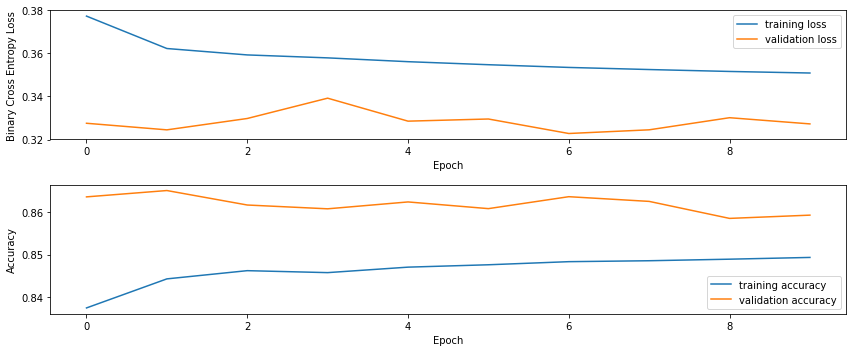

In [39]:
plot_model_results(history)

In [40]:
test_loss_p9am, test_acc_p9am, t = model.evaluate(X_test_p9am, y_test)
print(f"Test Loss: {test_loss_p9am}\nTest Accuracy: {test_acc_p9am}")

11685/11685 [==============================] - 0s 17us/step
Test Loss: 0.28830910684667593
Test Accuracy: 0.8753102267864784


#### Rank Models

In [41]:
result = {'Models':['Base line','Without Humidity 3pm',"Without Rain Today", 'Without Humidity 9am','Without Rainfall','Without Pressure 9am'], 
          'Test Accuracy':[test_acc, test_acc_h3pm, test_acc_rt, test_acc_h9am,test_acc_rf, test_acc_p9am]}
result_df = pd.DataFrame(data = result)
result_df['Difference from Base line'] = [test_acc - i for i in result_df['Test Accuracy']]
result_df.sort_values(by = 'Difference from Base line', ascending=False).set_index('Models')

,Test Accuracy,Difference from Base line
Models,,
Base line,0.870946,0.000000
Without Humidity 3pm,0.871117,-0.000171
Without Rain Today,0.872315,-0.001369
Without Rainfall,0.872315,-0.001369
Without Pressure 9am,0.875310,-0.004365
Without Humidity 9am,0.877878,-0.006932


### Result
From the result we get above, we can see that the most significant feature in our prediction is Humidity at 3pm, which proved our hypothesis that humidity is more influencial on the weather next day.

### Model 3
Here we train a neural network with the same architecture as the baseline on a reduced dataset. We drop all columns other than humidity at 9 am and 3 pm. We then train the network in the same fashion as before, utilizing a validation dataset to prevent overfitting

In [42]:
df = df[['Humidity9am', 'Humidity3pm', 'RainTomorrow']]
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, val_pct=.2, test_pct=.1)
df.head()

Training data length:   81798
Validation data length: 23371
Test data length:       11685


,Humidity9am,Humidity3pm,RainTomorrow
0,0.158151,-1.400501,0
1,-1.286403,-1.255039,0
2,-1.607415,-1.012603,0
3,-1.232901,-1.691425,0
4,0.746673,-0.867141,0


In [43]:
import tensorflow as tf
from tensorflow import keras

INPUT_DIM = X_train.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [44]:
from keras.callbacks import History 

history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.4249 - acc: 0.8220 - binary_crossentropy: 0.4249 - val_loss: 0.4009 - val_acc: 0.8307 - val_binary_crossentropy: 0.4009
Epoch 2/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.4175 - acc: 0.8248 - binary_crossentropy: 0.4175 - val_loss: 0.3991 - val_acc: 0.8296 - val_binary_crossentropy: 0.3991
Epoch 3/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.4167 - acc: 0.8256 - binary_crossentropy: 0.4167 - val_loss: 0.4012 - val_acc: 0.8273 - val_binary_crossentropy: 0.4012
Epoch 4/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.4162 - acc: 0.8262 - binary_crossentropy: 0.4162 - val_loss: 0.4028 - val_acc: 0.8268 - val_binary_crossentropy: 0.4028
Epoch 5/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.4158 - acc: 0.8266 - binary_crossentropy: 0.4158 - val_loss: 0.39

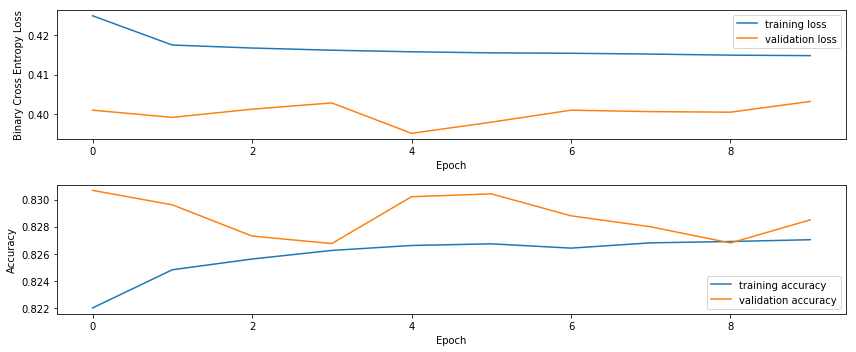

In [45]:
plot_model_results(history)

In [46]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Model 3\nTest Loss: {test_loss}\nTest Accuracy: {test_acc}")

11685/11685 [==============================] - 0s 17us/step
Model 3
Test Loss: 0.35328488255833834
Test Accuracy: 0.8541720154043646


## Analysis

